# Week 5 handin - by Sebastian Bentley (cph-sb287)

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 02 Status
A solution is given to all obligatory exercises

## 03 Solution part 1

In [37]:
import pandas as pd
#What is the change in pct of divorced danes from 2008 to 2020?
d2008 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4', sep=';')
d2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2020K4', sep=';')

diff = d2020['INDHOLD'] - d2008['INDHOLD']
change_in_pct = (diff / d2008['INDHOLD']) * 100
print('Change in divorces: ' +  str(float(change_in_pct)) + '%')

Change in divorces: 27.82860818778404%


In [47]:
#Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
five_biggest = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101%2C461%2C851%2C751%2C561&CIVILSTAND=U&Tid=2020K4', sep=';')
five_biggest.sort_values('INDHOLD', ascending=False)
answer = five_biggest['OMRÅDE'][0]
print('Answer: ' + str(answer))

Answer: København


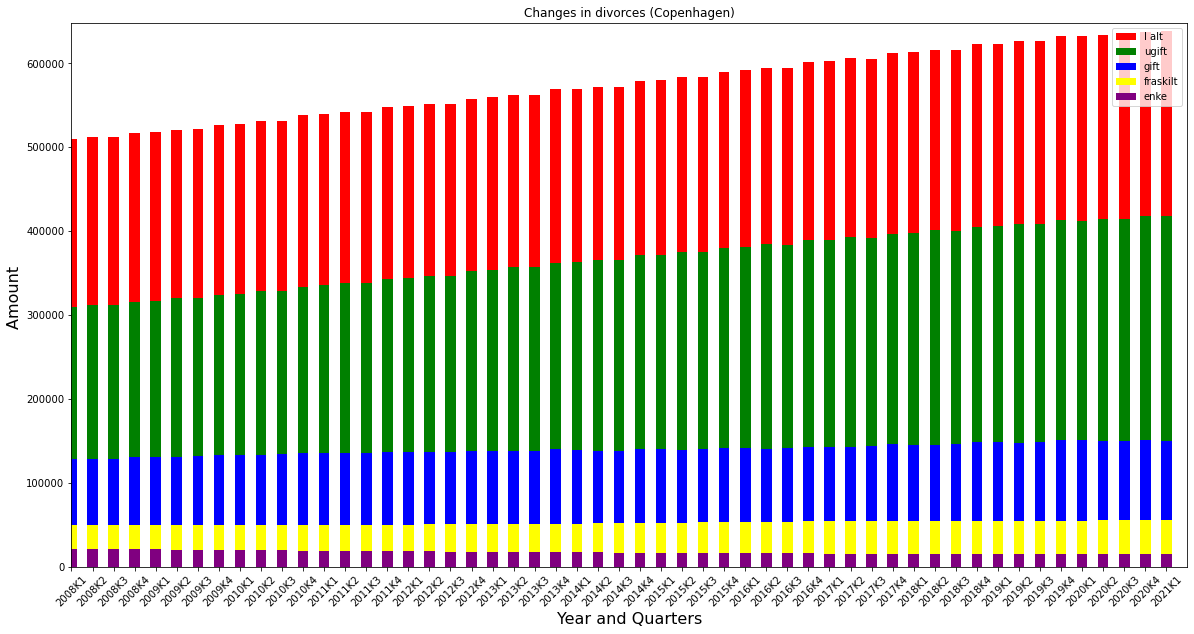

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
bar_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=*&Tid=*', sep=';')

tid = sorted(list(set(bar_data['TID'])))

i_alt = bar_data.loc[bar_data['CIVILSTAND'] == 'I alt']['INDHOLD']
ugift = bar_data.loc[bar_data['CIVILSTAND'] == 'Ugift']['INDHOLD']
gift = bar_data.loc[bar_data['CIVILSTAND'] == 'Gift/separeret']['INDHOLD']
enke = bar_data.loc[bar_data['CIVILSTAND'] == 'Enke/enkemand']['INDHOLD']
fraskilt = bar_data.loc[bar_data['CIVILSTAND'] == 'Fraskilt']['INDHOLD']
plt.figure(figsize=(20,10))
plt.ticklabel_format(useOffset=False)

plt.axis([0, len(tid), 0, max(bar_data['INDHOLD']) + 10000])
plt.xticks(rotation=45)
plt.title('Changes in divorces (Copenhagen)', fontsize=12)
plt.xlabel('Year and Quarters', fontsize=16)
plt.ylabel('Amount ', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=10)


p1 = plt.bar(tid, i_alt, width=0.5, linewidth=0, align='center', color='red')
p2 = plt.bar(tid, ugift, width=0.5, linewidth=0, align='center', color='green')
p3 = plt.bar(tid, gift, width=0.5, linewidth=0, align='center', color='blue')
p4 = plt.bar(tid, fraskilt, width=0.5, linewidth=0, align='center', color='yellow')
p5 = plt.bar(tid, enke, width=0.5, linewidth=0, align='center', color='purple')

plt.legend([p1,p2,p3,p4,p5],['I alt', 'ugift', 'gift','fraskilt', 'enke'], loc=1)




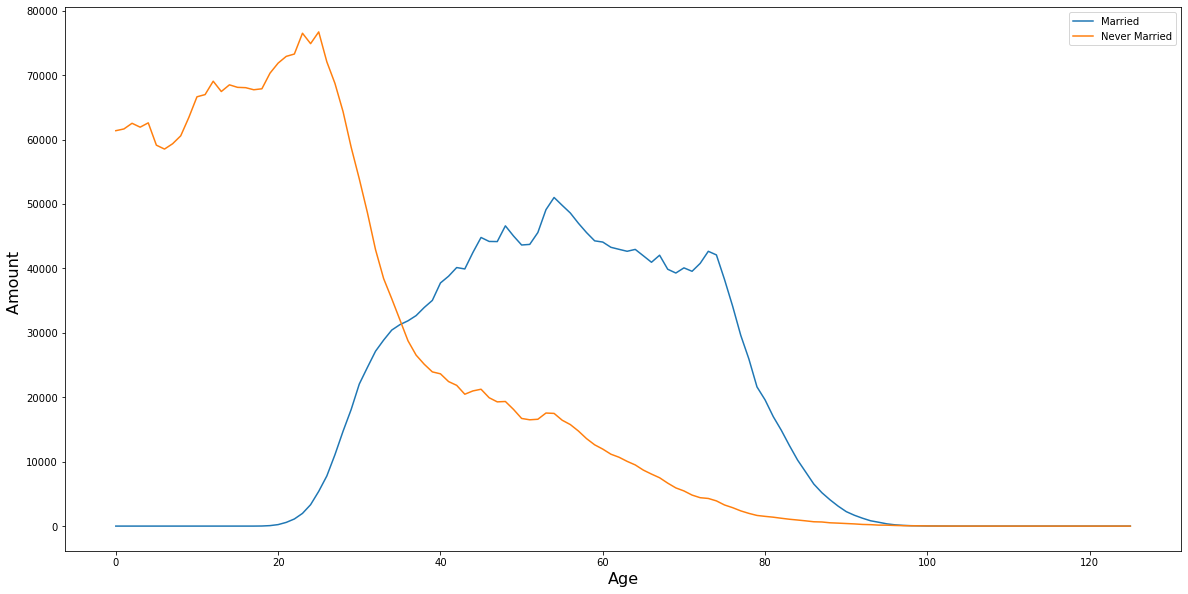

In [206]:
#Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
gift_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&OMR%C3%85DE=000&CIVILSTAND=G%2CU&Tid=2020K4', sep=';')
x = list(range(0, 126))
y1 = gift_data.loc[gift_data['CIVILSTAND'] == 'Gift/separeret']['INDHOLD'][1:]
y2 = gift_data.loc[gift_data['CIVILSTAND'] == 'Ugift']['INDHOLD'][1:]
plt.figure(figsize=(20,10))
plt.plot(x, y1, label='Married')
plt.plot(x, y2, label='Never Married')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Amount ', fontsize=16)
plt.legend()